In [152]:
!pip3 install ipython-sql

In [153]:
import csv, sqlite3
import pandas as pd

conn = sqlite3.connect("FRANCHISE.db")
cur = conn.cursor()

In [154]:
%load_ext sql

%sql sqlite:///FRANCHISE.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [155]:
ccc_df = pd.read_csv("chocolate_chip_cookies.csv")
orc_df = pd.read_csv("oatmeal_raisin_cookies.csv")

ccc_df.rename(columns = {"quantity_sold": "choc_chip_sold"}, inplace = True)
orc_df.rename(columns = {"quantity_sold": "oat_raisin_sold"}, inplace = True)

ccc_df["date"] = pd.to_datetime(ccc_df["date"])
orc_df["date"] = pd.to_datetime(orc_df["date"])

/var/folders/6r/h3y20fbx2ws9vnv_mf0r9gw80000gn/T/ipykernel_6653/4104316861.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ccc_df["date"] = pd.to_datetime(ccc_df["date"])
/var/folders/6r/h3y20fbx2ws9vnv_mf0r9gw80000gn/T/ipykernel_6653/4104316861.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orc_df["date"] = pd.to_datetime(orc_df["date"])


In [156]:
ccc_df.to_sql("choc_chip", conn, if_exists = "replace", index = False, method = "multi")
orc_df.to_sql("oat_raisin", conn, if_exists = "replace", index = False, method = "multi")

98

The following query will generate the oatmeal raisin sales from the days when there were no chocolate chip cookies. This is because dates were removed from the file when there were none of that item available.

In [157]:
%%sql
select * from oat_raisin
where date not in (
    select date from choc_chip)

 * sqlite:///FRANCHISE.db
Done.


date,oat_raisin_sold
2024-03-01 00:00:00,1
2024-04-12 00:00:00,4
2024-04-15 00:00:00,12
2024-04-25 00:00:00,2
2024-04-26 00:00:00,1
2024-06-06 00:00:00,10
2024-06-07 00:00:00,5
2024-08-22 00:00:00,2
2024-08-23 00:00:00,2


In [158]:
%%sql
select choc_chip.date, oat_raisin.date from choc_chip, oat_raisin

 * sqlite:///FRANCHISE.db
Done.


date,date_1
2024-02-29 00:00:00,2024-02-29 00:00:00
2024-02-29 00:00:00,2024-03-01 00:00:00
2024-02-29 00:00:00,2024-03-04 00:00:00
2024-02-29 00:00:00,2024-03-13 00:00:00
2024-02-29 00:00:00,2024-03-14 00:00:00
2024-02-29 00:00:00,2024-03-15 00:00:00
2024-02-29 00:00:00,2024-03-18 00:00:00
2024-02-29 00:00:00,2024-03-19 00:00:00
2024-02-29 00:00:00,2024-03-20 00:00:00
2024-02-29 00:00:00,2024-03-21 00:00:00


Make a dataframe with all the dates represented between both chocolate chip cookies and oatmeal raisin cookies so it can be used to join the two tables

In [159]:
datelist = ccc_df["date"].tolist() + orc_df["date"].tolist()
dateset = set(datelist)
alldates = pd.DataFrame(dateset, columns = ["date"])

alldates["date"] = pd.to_datetime(alldates["date"])
alldates = alldates.sort_values(by = "date")

alldates.to_sql("dates", conn, if_exists = "replace", index = False, method = "multi")

121

In [160]:
%%sql
select dates.date, choc_chip.choc_chip_sold, oat_raisin.oat_raisin_sold from dates
left join choc_chip on dates.date = choc_chip.date
left join oat_raisin on dates.date = oat_raisin.date

 * sqlite:///FRANCHISE.db
Done.


date,choc_chip_sold,oat_raisin_sold
2024-02-29 00:00:00,12,8
2024-03-01 00:00:00,None,1
2024-03-04 00:00:00,25,3
2024-03-05 00:00:00,26,None
2024-03-06 00:00:00,25,None
2024-03-07 00:00:00,21,None
2024-03-13 00:00:00,34,9
2024-03-14 00:00:00,12,2
2024-03-15 00:00:00,17,2
2024-03-18 00:00:00,16,7


In [161]:
query = "select dates.date, choc_chip.choc_chip_sold, oat_raisin.oat_raisin_sold from dates left join choc_chip on dates.date = choc_chip.date left join oat_raisin on dates.date = oat_raisin.date"
all_cookie_data = pd.read_sql_query(query, conn)
all_cookie_data

# all_cookie_data.to_csv("cookie_tracker.csv")

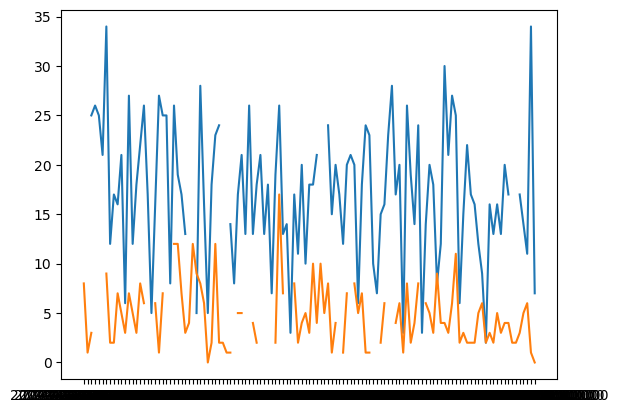

In [162]:
import matplotlib.pyplot as plt

x = all_cookie_data["date"].tolist()
ycc = all_cookie_data["choc_chip_sold"].tolist()
yor = all_cookie_data["oat_raisin_sold"].tolist()

plt.plot(x, ycc)
plt.plot(x, yor)

<Axes: xlabel='choc_chip_sold', ylabel='oat_raisin_sold'>

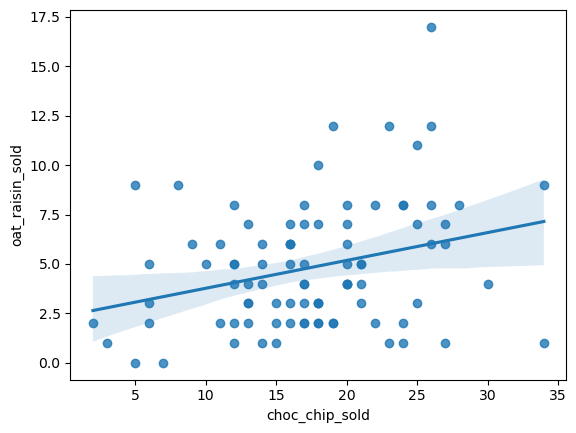

In [164]:
import seaborn as sns
sns.regplot(x="choc_chip_sold", y = "oat_raisin_sold", data = all_cookie_data)